In [1]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import pickle
import re
import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#GLEAM catalogue file name
GLEAM_file = '/home/vlad/software/SKA/algorithm-reference-library/data/models/GLEAM_EGC.fits'

In [3]:
hdul = fits.open(GLEAM_file)

In [4]:
hdul.info()

Filename: /home/vlad/software/SKA/algorithm-reference-library/data/models/GLEAM_EGC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (56898,)   uint8   
  1  Joined        1 BinTableHDU   1563   307455R x 311C   [20A, E, E, 11A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E

In [5]:
print("Total number of sources in GLEAM is ", len(hdul[1].data))

Total number of sources in GLEAM is  307455


In [6]:
#MWA EoR field centre coordinates
c_EoR0 = SkyCoord('0h00m00.0s', '-27d00m00s', frame='icrs')
c_EoR1 = SkyCoord('4h00m00.0s', '-30d00m00s', frame='icrs')
c_EoR2 = SkyCoord('11h20m00.0s', '-10d00m00s', frame='icrs')

In [7]:
# Radius of the field, degrees
rdeg = 20.0

In [8]:
#Find the declination limits to perform a search
dec_EoR = [c_EoR0.dec.deg, c_EoR1.dec.deg, c_EoR2.dec.deg]
dec_min = min(dec_EoR) - rdeg
dec_max = max(dec_EoR) + rdeg
if dec_min < -90.0:
    dec_min = -90.0
if dec_max > 90.0:
    dec_max = 90.0

In [9]:
print("Declination min and max : ", dec_min, dec_max)

Declination min and max :  -50.0 10.0


In [10]:
%%time
#Extracting source lists for three EoR fields withing 20deg from the centre
#No multi-threading, takes long time (about 15-20 min)
EoR0_list = []
EoR1_list = []
EoR2_list = []
for i in range(len(hdul[1].data)):
    if(i%10000 == 0):
        print(i, len(hdul[1].data))
    c1 = SkyCoord(hdul[1].data[i][3], hdul[1].data[i][4], unit=(u.hourangle, u.deg), frame='icrs')
# Exclude the sources outside the declination range [dec_min, dec_max]
    if c1.dec.deg <= dec_max and c1.dec.deg >= dec_min:
        sep = c_EoR0.separation(c1)
        if sep.deg <= rdeg:
            EoR0_list.append(hdul[1].data[i])
        sep = c_EoR1.separation(c1)
        if sep.deg <= rdeg:
            EoR1_list.append(hdul[1].data[i])
        sep = c_EoR2.separation(c1)
        if sep.deg <= rdeg:
            EoR2_list.append(hdul[1].data[i])        

0 307455
10000 307455


20000 307455
30000 307455
40000 307455
50000 307455
60000 307455
70000 307455
80000 307455
90000 307455
100000 307455
110000 307455
120000 307455
130000 307455
140000 307455
150000 307455
160000 307455
170000 307455
180000 307455
190000 307455
200000 307455
210000 307455
220000 307455
230000 307455
240000 307455
250000 307455
260000 307455
270000 307455
280000 307455
290000 307455
300000 307455
CPU times: user 14min 55s, sys: 4.2 s, total: 14min 59s
Wall time: 14min 58s


In [11]:
print("Source number in EoR0, EoR1 and EoR2 :", len(EoR0_list), len(EoR1_list), len(EoR2_list))

Source number in EoR0, EoR1 and EoR2 : 21931 22257 20026


In [12]:
#Write EoR0 list in a pickle
pickle_out = open("EoR0.pickle","wb")
pickle.dump(EoR0_list, pickle_out)
pickle_out.close()

In [13]:
#Write EoR1 list in a pickle
pickle_out = open("EoR1.pickle","wb")
pickle.dump(EoR1_list, pickle_out)
pickle_out.close()

In [14]:
#Write EoR2 list in a pickle
pickle_out = open("EoR2.pickle","wb")
pickle.dump(EoR2_list, pickle_out)
pickle_out.close()

In [15]:
#Read EoR0 list from the pickle and check the length
pickle_in = open("EoR0.pickle","rb")
EoR0_plist = pickle.load(pickle_in)
pickle_in.close()
print("A number of sources in EoR0 list imported from the pickle is ", len(EoR0_plist))

A number of sources in EoR0 list imported from the pickle is  21931


In [16]:
#Read EoR1 list from the pickle and check the length
pickle_in = open("EoR1.pickle","rb")
EoR1_plist = pickle.load(pickle_in)
pickle_in.close()
print(len(EoR1_plist))
print("A number of sources in EoR1 list imported from the pickle is ", len(EoR1_plist))

22257
A number of sources in EoR1 list imported from the pickle is  22257


In [17]:
#Read EoR1 list from the pickle and check the length
pickle_in = open("EoR2.pickle","rb")
EoR2_plist = pickle.load(pickle_in)
pickle_in.close()
print("A number of sources in EoR2 list imported from the pickle is ", len(EoR2_plist))

A number of sources in EoR2 list imported from the pickle is  20026


In [18]:
# A list of 20 GLEAM frequencies
freqs = [76,84,92,99,107,115,122,130,143,151,158,166,174,181,189,197,204,212,220,227]

In [19]:
# A list of the corresponding column indices
idx = [31,45,59,73,87,101,115,129,143,157,171,185,199,213,227,241,255,269,283,297]

In [20]:
# Plot the spectra for some arbitrary sources to check the consistency
indx = 503

spind = []
spind.append(EoR0_plist[indx][306])
spind.append(EoR1_plist[indx][306])
spind.append(EoR2_plist[indx][306])

flux = []
fluxerr = []
flux_fitted = []
flux_wide = []
flux_wide.append(EoR0_plist[indx][309])
flux_wide.append(EoR1_plist[indx][309])
flux_wide.append(EoR2_plist[indx][309])

flux_wide_err = []
flux_wide_err.append(EoR0_plist[indx][310])
flux_wide_err.append(EoR1_plist[indx][310])
flux_wide_err.append(EoR2_plist[indx][310])

j = 0
for i in idx:
    # EoR0 source
    flux.append(EoR0_plist[indx][i-1])
    fluxerr.append(EoR0_plist[indx][i])
    flux_fit = flux_wide[0]*(freqs[j]/200.)**spind[0]
    flux_fitted.append(flux_fit)
    j = j+1
j = 0
for i in idx:
    # EoR1 source
    flux.append(EoR1_plist[indx][i-1])
    fluxerr.append(EoR1_plist[indx][i])
    flux_fit = flux_wide[1]*(freqs[j]/200.)**spind[1]
    flux_fitted.append(flux_fit)
    j = j+1
j = 0    
for i in idx:    
    # EoR2 source
    flux.append(EoR2_plist[indx][i-1])
    fluxerr.append(EoR2_plist[indx][i])
    flux_fit = flux_wide[2]*(freqs[j]/200.)**spind[2]
    flux_fitted.append(flux_fit)
    j = j+1

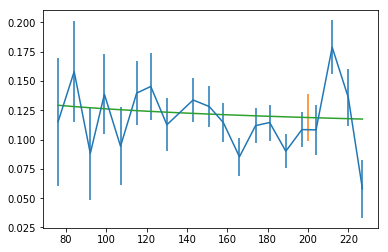

In [21]:
# A source spectra from EoR0 list
plt.errorbar(freqs, flux[0:20], fluxerr[0:20]);
plt.errorbar([200], flux_wide[0], flux_wide_err[0]);
plt.plot(freqs, flux_fitted[0:20]);

In [22]:
# A source spectra from EoR1 list
plt.errorbar(freqs, flux[20:40], fluxerr[20:40]);
plt.errorbar([200], flux_wide[1], flux_wide_err[1]);
plt.plot(freqs, flux_fitted[20:40]);

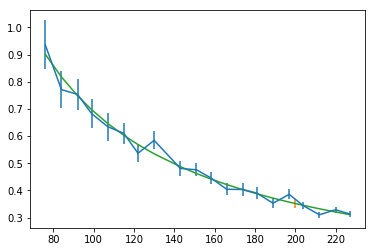

In [23]:
# A source spectra from EoR2 list
plt.errorbar(freqs, flux[40:60], fluxerr[40:60]);
plt.errorbar([200], flux_wide[2], flux_wide_err[2]);
plt.plot(freqs, flux_fitted[40:60]);